In [2]:
import pandas as pd
import numpy as np
import yaml
import math
import os
import matplotlib.pyplot as plt
import scipy.stats

min_overs = 80
min_pair_overs = 16  # 1/5th of min_overs

In [4]:
og_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/Main Stuff/T20out.csv')
bovercnt = og_data.groupby('bowler').count()
bovercnt = bovercnt.drop(['runs', 'wicket'], axis =1)
qbovercnt = bovercnt.loc[bovercnt['over'] >= min_overs]

pd.set_option('display.max_rows', 10000)
bovercnt

,over
bowler,
A Aitken,8
A Ashokan,3
A Bierwisch,3
A Bohara,40
A Brindle,14
A Chilia,7
A Dananjaya,37
A Das,13
A Doddaballapur,6


In [7]:
paired_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/T20pair.csv')
paired_data

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
0,10,1,1,ST Finn,10,0,2,SCJ Broad
1,12,1,3,ST Finn,5,0,4,GP Swann
2,4,1,5,LJ Wright,6,1,6,GP Swann
3,3,1,7,JW Dernbach,18,0,8,SCJ Broad
4,0,1,1,C Sutthiruang,0,0,2,R Padunglerd
...,...,...,...,...,...,...,...,...
13241,7,0,9,ST Jayasuriya,11,0,10,TM Dilshan
13242,3,1,11,ST Jayasuriya,20,0,12,TM Dilshan
13243,3,1,13,BAW Mendis,9,0,14,HMCM Bandara
13244,6,0,15,BAW Mendis,7,1,16,ST Jayasuriya


In [8]:
pairdf = paired_data.groupby(['bowler1','bowler2']).size().append(paired_data.groupby(['bowler2','bowler1']).size())
pairdf

bowler1      bowler2           
A Aitken     K Fraser              3
             K McGill              1
             RS Glen               1
             S Haggo               1
A Bohara     J Kila                1
                                  ..
Zumika Azmi  Mas Elysa             2
             Nur Arianna Natsya    2
             Nur Nadihirah         4
             Sasha Azmi            6
             WA Duraisingam        1
Length: 13110, dtype: int64

In [9]:
#names = og_data['bowler'].unique()
bnames = qbovercnt.index
Bpartners = {}
for name in bnames:
    Bpartners[name] = []
    Bpartners[name] = paired_data.query('bowler1 == @name')['bowler2'].append(paired_data.query('bowler2 == @name')['bowler1']).unique()

len(Bpartners)

45

In [10]:
paircnt = 0 
for k, v in Bpartners.items():
    for name in v:
        povercnt = pairdf[k][name].sum()
        if (povercnt >= min_pair_overs):
            if(k<name):
                print(k,name, povercnt)
                paircnt += 1
print(paircnt)

A Shrubsole KH Brunt 31
AD Mathews KMDN Kulasekara 25
DJ Bravo SJ Benn 20
EA Perry ML Schutt 29
GH Dockrell KJ O'Brien 18
GH Dockrell WB Rankin 16
JL Jonassen ML Schutt 17
KMDN Kulasekara SL Malinga 23
M Kapp S Ismail 35
Mashrafe Mortaza Shakib Al Hasan 16
Mohammad Hafeez Shahid Afridi 40
Mohammad Nabi Rashid Khan 18
Nida Dar Sadia Yousuf 29
Poonam Yadav RP Yadav 20
R Ashwin RA Jadeja 19
Saeed Ajmal Umar Gul 25
Saeed Ajmal Shahid Afridi 30
Shahid Afridi Shoaib Malik 19
18


In [11]:
bocnt = 0 
Bpartner_qualified = {}
for k, v in Bpartners.items():
    Bpartner_qualified[k] = []
    for name in v:
        bocnt = pairdf[k][name].sum()
        if (bocnt >= min_pair_overs):
            Bpartner_qualified[k].append(name)

for k,v in Bpartners.items():
    if Bpartner_qualified[k] == []:
        del Bpartner_qualified[k]
            
#Bpartner_qualified
print(len(Bpartner_qualified))
print(Bpartner_qualified)

#Bpartner_qualified.keys()

28
{'A Shrubsole': ['KH Brunt'], 'AD Mathews': ['KMDN Kulasekara'], 'DJ Bravo': ['SJ Benn'], 'EA Perry': ['ML Schutt'], 'GH Dockrell': ["KJ O'Brien", 'WB Rankin'], 'JL Jonassen': ['ML Schutt'], 'KH Brunt': ['A Shrubsole'], 'KMDN Kulasekara': ['SL Malinga', 'AD Mathews'], 'M Kapp': ['S Ismail'], 'ML Schutt': ['JL Jonassen', 'EA Perry'], 'Mashrafe Mortaza': ['Shakib Al Hasan'], 'Mohammad Hafeez': ['Shahid Afridi'], 'Mohammad Nabi': ['Rashid Khan'], 'Nida Dar': ['Sadia Yousuf'], 'Poonam Yadav': ['RP Yadav'], 'R Ashwin': ['RA Jadeja'], 'RA Jadeja': ['R Ashwin'], 'Rashid Khan': ['Mohammad Nabi'], 'Rumana Ahmed': ['Fahima Khatun', 'Khadija Tul Kubra'], 'S Ismail': ['M Kapp'], 'SL Malinga': ['KMDN Kulasekara'], 'Saeed Ajmal': ['Umar Gul', 'Shahid Afridi'], 'Salma Khatun': ['Jahanara Alam'], 'Sana Mir': ['Sadia Yousuf'], 'Shahid Afridi': ['Saeed Ajmal', 'Shoaib Malik', 'Mohammad Hafeez'], 'Shakib Al Hasan': ['Mashrafe Mortaza', 'Mustafizur Rahman', 'Mahmudullah'], 'Umar Gul': ['Saeed Ajmal'], 

In [12]:
for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:
        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]
        break
dfpairba

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
2630,4,1,1,GH Dockrell,4,0,2,WB Rankin
2631,3,1,3,GH Dockrell,0,1,4,WB Rankin
6529,8,0,11,GH Dockrell,4,1,12,WB Rankin
7158,8,0,9,GH Dockrell,2,0,10,WB Rankin
9125,7,0,18,GH Dockrell,6,1,19,WB Rankin
12479,7,0,11,GH Dockrell,4,0,12,WB Rankin
12482,17,0,17,GH Dockrell,3,1,18,WB Rankin


A Shrubsole KH Brunt


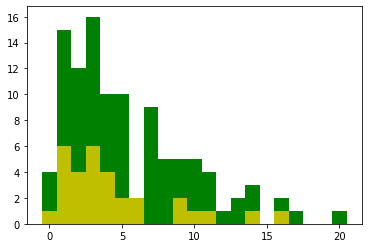

Bowler's Economy  :  5.420560747663552
Bowlership's Economy  :  4.483870967741935


Bowler's Skew     :  1.0591855341917646
Bowlership's Skew :  0.8604911313014011
Bowler's Kurtosis     :  0.6409173801256034
Bowlership's Kurtosis :  -0.7609973411426028


Greater : Statistics=155.00, p=0.02 
Two-Sided : Statistics=155.00, p=0.05 
Less : Statistics=155.00, p=0.98 

A Shrubsole - KH Brunt better than A Shrubsole
____________________________________________


AD Mathews KMDN Kulasekara


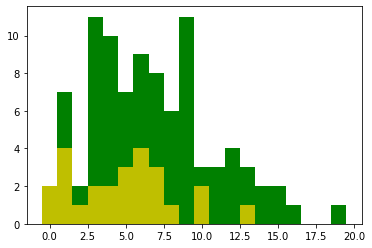

Bowler's Economy  :  6.728260869565218
Bowlership's Economy  :  4.84


Bowler's Skew     :  0.57324570799453
Bowlership's Skew :  0.3752025549913063
Bowler's Kurtosis     :  -0.06969616209586782
Bowlership's Kurtosis :  -1.0537981733125423


Greater : Statistics=145.00, p=0.02 
Two-Sided : Statistics=145.00, p=0.04 
Less : Statistics=145.00, p=0.98 

AD Mathews - KMDN Kulasekara better than AD Mathews
____________________________________________


DJ Bravo SJ Benn


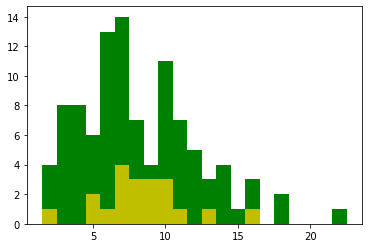

Bowler's Economy  :  8.168316831683168
Bowlership's Economy  :  8.35


Bowler's Skew     :  0.7562934783901094
Bowlership's Skew :  0.45643546458763845
Bowler's Kurtosis     :  0.4522388594002127
Bowlership's Kurtosis :  -1.3333333333333333


Greater : Statistics=144.00, p=0.00 
Two-Sided : Statistics=144.00, p=0.00 
Less : Statistics=144.00, p=1.00 

____________________________________________


EA Perry ML Schutt


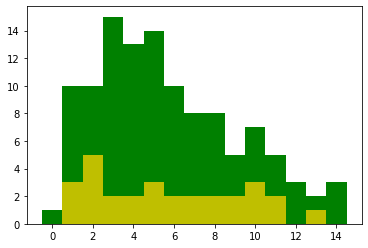

Bowler's Economy  :  5.7105263157894735
Bowlership's Economy  :  5.758620689655173


Bowler's Skew     :  0.5769655415037377
Bowlership's Skew :  1.3912569940419277
Bowler's Kurtosis     :  -0.4990250357943342
Bowlership's Kurtosis :  1.94639007050871


Greater : Statistics=155.00, p=0.00 
Two-Sided : Statistics=155.00, p=0.00 
Less : Statistics=155.00, p=1.00 

____________________________________________


GH Dockrell KJ O'Brien


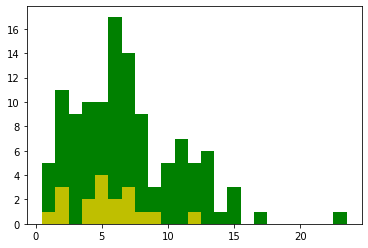

Bowler's Economy  :  6.897435897435898
Bowlership's Economy  :  5.388888888888889


Bowler's Skew     :  0.9010815282881204
Bowlership's Skew :  0.5692099788303082
Bowler's Kurtosis     :  1.1445246388100525
Bowlership's Kurtosis :  -1.02


Greater : Statistics=128.00, p=0.00 
Two-Sided : Statistics=128.00, p=0.01 
Less : Statistics=128.00, p=1.00 

GH Dockrell - KJ O'Brien better than GH Dockrell
____________________________________________


GH Dockrell WB Rankin


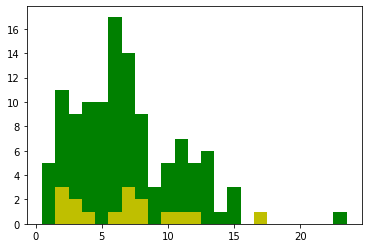

Bowler's Economy  :  6.897435897435898
Bowlership's Economy  :  6.8125


Bowler's Skew     :  0.9010815282881204
Bowlership's Skew :  0.8437499999999997
Bowler's Kurtosis     :  1.1445246388100525
Bowlership's Kurtosis :  -0.9218750000000009


Greater : Statistics=147.00, p=0.00 
Two-Sided : Statistics=147.00, p=0.00 
Less : Statistics=147.00, p=1.00 

GH Dockrell - WB Rankin better than GH Dockrell
____________________________________________


JL Jonassen ML Schutt


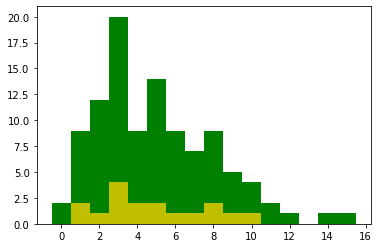

Bowler's Economy  :  4.9714285714285715
Bowlership's Economy  :  4.823529411764706


Bowler's Skew     :  0.7877319449553405
Bowlership's Skew :  1.4485596707818928
Bowler's Kurtosis     :  0.34792076663318294
Bowlership's Kurtosis :  1.4531321444901693


Greater : Statistics=121.00, p=0.00 
Two-Sided : Statistics=121.00, p=0.01 
Less : Statistics=121.00, p=1.00 

JL Jonassen - ML Schutt better than JL Jonassen
____________________________________________


KH Brunt A Shrubsole


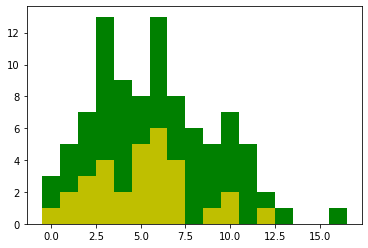

Bowler's Economy  :  5.795698924731183
Bowlership's Economy  :  5.096774193548387


Bowler's Skew     :  0.43987183673802
Bowlership's Skew :  0.5392380410500954
Bowler's Kurtosis     :  -0.28386936430571685
Bowlership's Kurtosis :  -0.956246000978584


Greater : Statistics=130.00, p=0.01 
Two-Sided : Statistics=130.00, p=0.01 
Less : Statistics=130.00, p=0.99 

KH Brunt - A Shrubsole better than KH Brunt
____________________________________________


KMDN Kulasekara SL Malinga


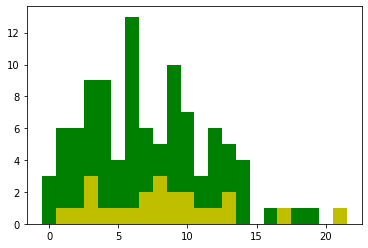

Bowler's Economy  :  7.306930693069307
Bowlership's Economy  :  8.26086956521739


Bowler's Skew     :  0.5652766723866333
Bowlership's Skew :  0.9636947722636651
Bowler's Kurtosis     :  -0.06757555828396233
Bowlership's Kurtosis :  -0.4485731272294884


Greater : Statistics=245.50, p=0.00 
Two-Sided : Statistics=245.50, p=0.00 
Less : Statistics=245.50, p=1.00 

____________________________________________


KMDN Kulasekara AD Mathews


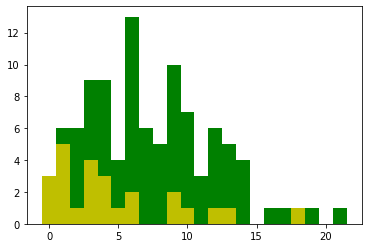

Bowler's Economy  :  7.306930693069307
Bowlership's Economy  :  4.76


Bowler's Skew     :  0.5652766723866333
Bowlership's Skew :  0.9329606515907767
Bowler's Kurtosis     :  -0.06757555828396233
Bowlership's Kurtosis :  -0.37951778543197756


Greater : Statistics=185.00, p=0.01 
Two-Sided : Statistics=185.00, p=0.01 
Less : Statistics=185.00, p=1.00 

KMDN Kulasekara - AD Mathews better than KMDN Kulasekara
____________________________________________


M Kapp S Ismail


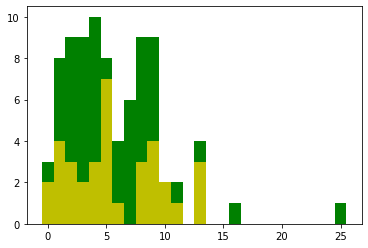

Bowler's Economy  :  5.729411764705882
Bowlership's Economy  :  5.685714285714286


Bowler's Skew     :  1.4462270748410786
Bowlership's Skew :  1.2082500497441215
Bowler's Kurtosis     :  4.134501842917901
Bowlership's Kurtosis :  1.4470180800438515


Greater : Statistics=131.00, p=0.02 
Two-Sided : Statistics=131.00, p=0.05 
Less : Statistics=131.00, p=0.98 

M Kapp - S Ismail better than M Kapp
____________________________________________


ML Schutt JL Jonassen


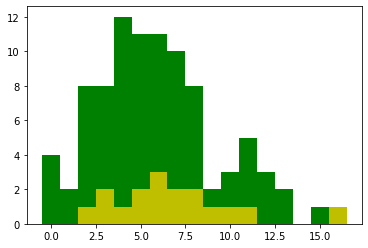

Bowler's Economy  :  5.945054945054945
Bowlership's Economy  :  6.823529411764706


Bowler's Skew     :  0.60705529022997
Bowlership's Skew :  0.8000483599402345
Bowler's Kurtosis     :  0.10379143866449203
Bowlership's Kurtosis :  -0.45118343195266153


Greater : Statistics=150.00, p=0.00 
Two-Sided : Statistics=150.00, p=0.00 
Less : Statistics=150.00, p=1.00 

____________________________________________


ML Schutt EA Perry


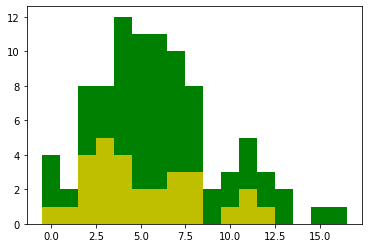

Bowler's Economy  :  5.945054945054945
Bowlership's Economy  :  5.206896551724138


Bowler's Skew     :  0.60705529022997
Bowlership's Skew :  0.5064643537207076
Bowler's Kurtosis     :  0.10379143866449203
Bowlership's Kurtosis :  -0.9829367787812893


Greater : Statistics=142.00, p=0.02 
Two-Sided : Statistics=142.00, p=0.03 
Less : Statistics=142.00, p=0.99 

ML Schutt - EA Perry better than ML Schutt
____________________________________________


Mashrafe Mortaza Shakib Al Hasan


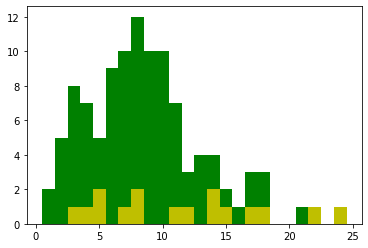

Bowler's Economy  :  8.685185185185185
Bowlership's Economy  :  11.6875


Bowler's Skew     :  0.8094711417880578
Bowlership's Skew :  1.2780193008453864
Bowler's Kurtosis     :  0.6365711836262773
Bowlership's Kurtosis :  -0.3666666666666689


Greater : Statistics=238.00, p=0.00 
Two-Sided : Statistics=238.00, p=0.00 
Less : Statistics=238.00, p=1.00 

____________________________________________


Mohammad Hafeez Shahid Afridi


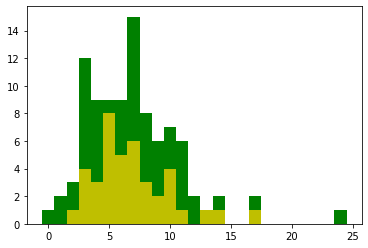

Bowler's Economy  :  6.957894736842105
Bowlership's Economy  :  6.875


Bowler's Skew     :  1.2627641473223978
Bowlership's Skew :  0.810808784928155
Bowler's Kurtosis     :  3.2551676110851213
Bowlership's Kurtosis :  -0.30329813284358664


Greater : Statistics=149.00, p=0.05 
Two-Sided : Statistics=149.00, p=0.11 
Less : Statistics=149.00, p=0.95 

____________________________________________


Mohammad Nabi Rashid Khan


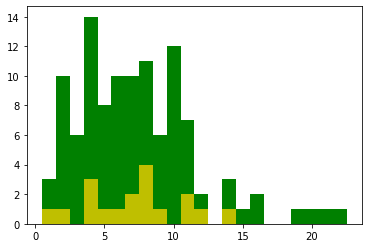

Bowler's Economy  :  7.348623853211009
Bowlership's Economy  :  7.166666666666667


Bowler's Skew     :  1.0656484764618932
Bowlership's Skew :  1.359097776830319
Bowler's Kurtosis     :  1.4156160604339743
Bowlership's Kurtosis :  0.5463733650416165


Greater : Statistics=162.50, p=0.01 
Two-Sided : Statistics=162.50, p=0.01 
Less : Statistics=162.50, p=1.00 

Mohammad Nabi - Rashid Khan better than Mohammad Nabi
____________________________________________


Nida Dar Sadia Yousuf


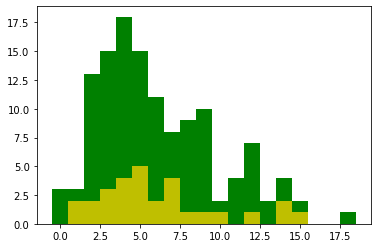

Bowler's Economy  :  6.165354330708661
Bowlership's Economy  :  6.137931034482759


Bowler's Skew     :  0.7610406258386092
Bowlership's Skew :  0.8006443958486681
Bowler's Kurtosis     :  -0.01782538492578256
Bowlership's Kurtosis :  -0.6426397146254468


Greater : Statistics=181.50, p=0.00 
Two-Sided : Statistics=181.50, p=0.00 
Less : Statistics=181.50, p=1.00 

Nida Dar - Sadia Yousuf better than Nida Dar
____________________________________________


Poonam Yadav RP Yadav


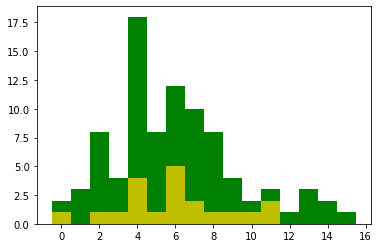

Bowler's Economy  :  5.977528089887641
Bowlership's Economy  :  5.95


Bowler's Skew     :  0.6795526385155528
Bowlership's Skew :  1.4780100145497264
Bowler's Kurtosis     :  0.17534376047911104
Bowlership's Kurtosis :  0.6599794238683119


Greater : Statistics=143.00, p=0.00 
Two-Sided : Statistics=143.00, p=0.01 
Less : Statistics=143.00, p=1.00 

Poonam Yadav - RP Yadav better than Poonam Yadav
____________________________________________


R Ashwin RA Jadeja


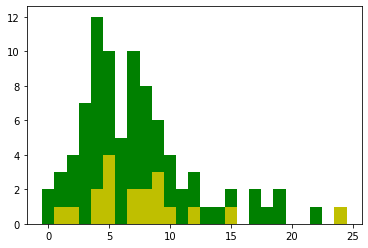

Bowler's Economy  :  7.344827586206897
Bowlership's Economy  :  7.842105263157895


Bowler's Skew     :  1.2352458509948787
Bowlership's Skew :  1.1794516367564722
Bowler's Kurtosis     :  1.4673938411175023
Bowlership's Kurtosis :  0.2892219387755106


Greater : Statistics=169.50, p=0.01 
Two-Sided : Statistics=169.50, p=0.03 
Less : Statistics=169.50, p=0.99 

____________________________________________


RA Jadeja R Ashwin


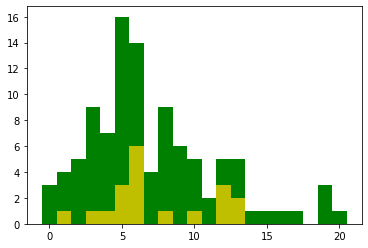

Bowler's Economy  :  7.088235294117647
Bowlership's Economy  :  7.315789473684211


Bowler's Skew     :  0.9001339220896395
Bowlership's Skew :  1.461786450372996
Bowler's Kurtosis     :  0.5383345188292248
Bowlership's Kurtosis :  1.081487416344613


Greater : Statistics=133.50, p=0.02 
Two-Sided : Statistics=133.50, p=0.04 
Less : Statistics=133.50, p=0.98 

____________________________________________


Rashid Khan Mohammad Nabi


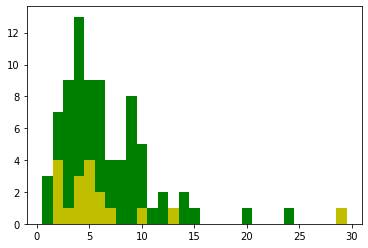

Bowler's Economy  :  6.679012345679013
Bowlership's Economy  :  6.333333333333333


Bowler's Skew     :  2.1140578822258043
Bowlership's Skew :  0.6872431934890912
Bowler's Kurtosis     :  6.138514240791292
Bowlership's Kurtosis :  -1.2551020408163265


Greater : Statistics=111.50, p=0.05 
Two-Sided : Statistics=111.50, p=0.11 
Less : Statistics=111.50, p=0.95 

____________________________________________


Rumana Ahmed Fahima Khatun


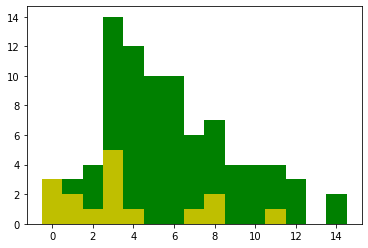

Bowler's Economy  :  5.732558139534884
Bowlership's Economy  :  3.5625


Bowler's Skew     :  0.538573303729499
Bowlership's Skew :  1.2958781931744932
Bowler's Kurtosis     :  -0.2669603035115977
Bowlership's Kurtosis :  0.510204081632653


Greater : Statistics=100.50, p=0.00 
Two-Sided : Statistics=100.50, p=0.00 
Less : Statistics=100.50, p=1.00 

Rumana Ahmed - Fahima Khatun better than Rumana Ahmed
____________________________________________


Rumana Ahmed Khadija Tul Kubra


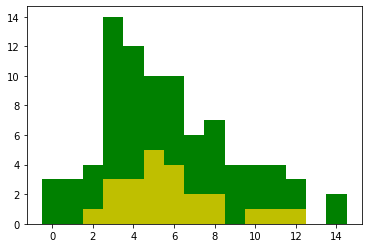

Bowler's Economy  :  5.732558139534884
Bowlership's Economy  :  5.869565217391305


Bowler's Skew     :  0.538573303729499
Bowlership's Skew :  0.6751246278620674
Bowler's Kurtosis     :  -0.2669603035115977
Bowlership's Kurtosis :  -0.7590122401636092


Greater : Statistics=120.00, p=0.00 
Two-Sided : Statistics=120.00, p=0.00 
Less : Statistics=120.00, p=1.00 

____________________________________________


S Ismail M Kapp


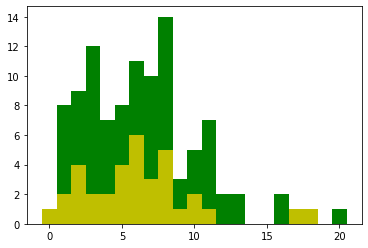

Bowler's Economy  :  6.4326923076923075
Bowlership's Economy  :  6.171428571428572


Bowler's Skew     :  0.8777162208216581
Bowlership's Skew :  0.8491075952082379
Bowler's Kurtosis     :  0.8464737916109502
Bowlership's Kurtosis :  -0.5018845467169211


Greater : Statistics=179.00, p=0.02 
Two-Sided : Statistics=179.00, p=0.04 
Less : Statistics=179.00, p=0.98 

S Ismail - M Kapp better than S Ismail
____________________________________________


SL Malinga KMDN Kulasekara


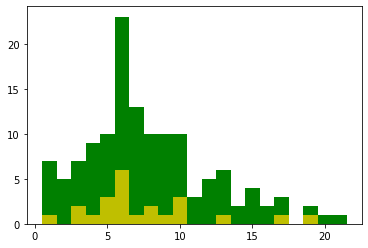

Bowler's Economy  :  7.849624060150376
Bowlership's Economy  :  7.521739130434782


Bowler's Skew     :  0.7759893669647714
Bowlership's Skew :  1.816953334746106
Bowler's Kurtosis     :  0.3129353003723625
Bowlership's Kurtosis :  2.5223207794096227


Greater : Statistics=203.50, p=0.00 
Two-Sided : Statistics=203.50, p=0.00 
Less : Statistics=203.50, p=1.00 

SL Malinga - KMDN Kulasekara better than SL Malinga
____________________________________________


Saeed Ajmal Umar Gul


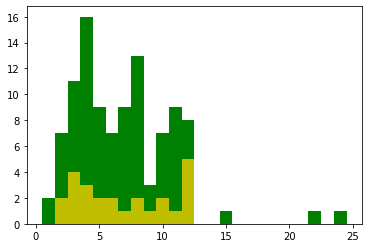

Bowler's Economy  :  6.923076923076923
Bowlership's Economy  :  6.92


Bowler's Skew     :  1.3229429995017914
Bowlership's Skew :  0.9954454566214693
Bowler's Kurtosis     :  3.343240910945738
Bowlership's Kurtosis :  0.04159828304507052


Greater : Statistics=128.50, p=0.01 
Two-Sided : Statistics=128.50, p=0.02 
Less : Statistics=128.50, p=0.99 

Saeed Ajmal - Umar Gul better than Saeed Ajmal
____________________________________________


Saeed Ajmal Shahid Afridi


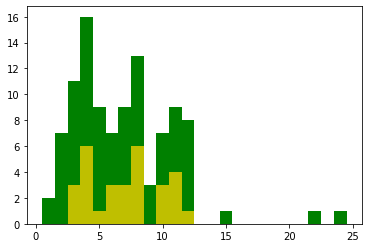

Bowler's Economy  :  6.923076923076923
Bowlership's Economy  :  7.033333333333333


Bowler's Skew     :  1.3229429995017914
Bowlership's Skew :  0.28663127443273007
Bowler's Kurtosis     :  3.343240910945738
Bowlership's Kurtosis :  -0.86094674556213


Greater : Statistics=99.00, p=0.03 
Two-Sided : Statistics=99.00, p=0.06 
Less : Statistics=99.00, p=0.97 

____________________________________________


Salma Khatun Jahanara Alam


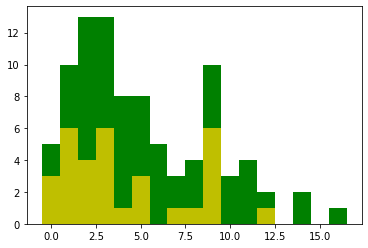

Bowler's Economy  :  5.076923076923077
Bowlership's Economy  :  4.125


Bowler's Skew     :  0.7273046689876186
Bowlership's Skew :  0.26098569422998297
Bowler's Kurtosis     :  -0.2882171096056192
Bowlership's Kurtosis :  -1.5348876357208998


Greater : Statistics=107.00, p=0.04 
Two-Sided : Statistics=107.00, p=0.08 
Less : Statistics=107.00, p=0.97 

____________________________________________


Sana Mir Sadia Yousuf


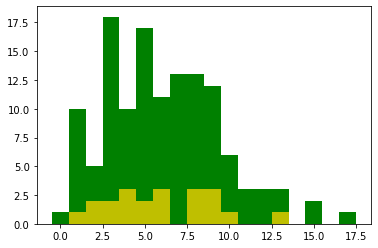

Bowler's Economy  :  6.1171875
Bowlership's Economy  :  5.9523809523809526


Bowler's Skew     :  0.5611079714547721
Bowlership's Skew :  -0.18843003091685656
Bowler's Kurtosis     :  0.129706318486551
Bowlership's Kurtosis :  -1.5261499684940136


Greater : Statistics=131.50, p=0.00 
Two-Sided : Statistics=131.50, p=0.01 
Less : Statistics=131.50, p=1.00 

Sana Mir - Sadia Yousuf better than Sana Mir
____________________________________________


Shahid Afridi Saeed Ajmal


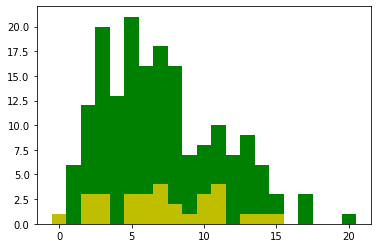

Bowler's Economy  :  7.067796610169491
Bowlership's Economy  :  7.233333333333333


Bowler's Skew     :  0.6189204861695744
Bowlership's Skew :  0.0074563537043522065
Bowler's Kurtosis     :  -0.1988363514004492
Bowlership's Kurtosis :  -1.5122043599023656


Greater : Statistics=204.00, p=0.00 
Two-Sided : Statistics=204.00, p=0.00 
Less : Statistics=204.00, p=1.00 

____________________________________________


Shahid Afridi Shoaib Malik


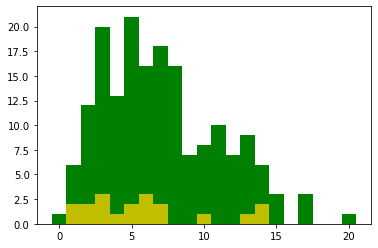

Bowler's Economy  :  7.067796610169491
Bowlership's Economy  :  5.894736842105263


Bowler's Skew     :  0.6189204861695744
Bowlership's Skew :  0.13994169096209966
Bowler's Kurtosis     :  -0.1988363514004492
Bowlership's Kurtosis :  -0.9604331528529775


Greater : Statistics=161.00, p=0.00 
Two-Sided : Statistics=161.00, p=0.00 
Less : Statistics=161.00, p=1.00 

Shahid Afridi - Shoaib Malik better than Shahid Afridi
____________________________________________


Shahid Afridi Mohammad Hafeez


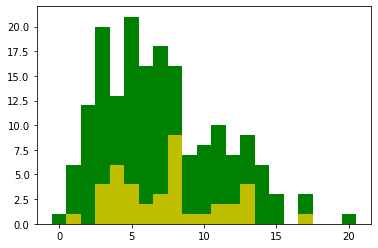

Bowler's Economy  :  7.067796610169491
Bowlership's Economy  :  7.4


Bowler's Skew     :  0.6189204861695744
Bowlership's Skew :  1.287853026877043
Bowler's Kurtosis     :  -0.1988363514004492
Bowlership's Kurtosis :  1.0185572730875956


Greater : Statistics=194.50, p=0.00 
Two-Sided : Statistics=194.50, p=0.00 
Less : Statistics=194.50, p=1.00 

____________________________________________


Shakib Al Hasan Mashrafe Mortaza


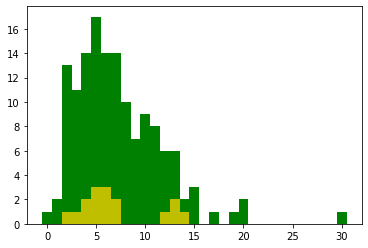

Bowler's Economy  :  7.28169014084507
Bowlership's Economy  :  7.0


Bowler's Skew     :  1.450265393750942
Bowlership's Skew :  0.41295036021294423
Bowler's Kurtosis     :  3.981877190378216
Bowlership's Kurtosis :  -1.2695999999999998


Greater : Statistics=140.50, p=0.01 
Two-Sided : Statistics=140.50, p=0.02 
Less : Statistics=140.50, p=0.99 

Shakib Al Hasan - Mashrafe Mortaza better than Shakib Al Hasan
____________________________________________


Shakib Al Hasan Mustafizur Rahman


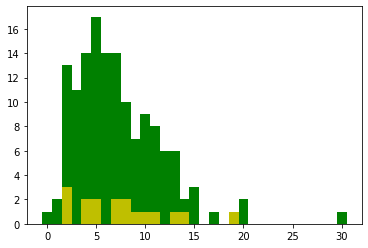

Bowler's Economy  :  7.28169014084507
Bowlership's Economy  :  7.647058823529412


Bowler's Skew     :  1.450265393750942
Bowlership's Skew :  0.8000483599402345
Bowler's Kurtosis     :  3.981877190378216
Bowlership's Kurtosis :  -0.451183431952662


Greater : Statistics=178.50, p=0.00 
Two-Sided : Statistics=178.50, p=0.00 
Less : Statistics=178.50, p=1.00 

____________________________________________


Shakib Al Hasan Mahmudullah


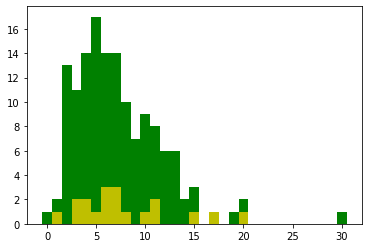

Bowler's Economy  :  7.28169014084507
Bowlership's Economy  :  7.947368421052632


Bowler's Skew     :  1.450265393750942
Bowlership's Skew :  0.8595996264252862
Bowler's Kurtosis     :  3.981877190378216
Bowlership's Kurtosis :  -0.7533749455653931


Greater : Statistics=194.50, p=0.00 
Two-Sided : Statistics=194.50, p=0.00 
Less : Statistics=194.50, p=1.00 

____________________________________________


Umar Gul Saeed Ajmal


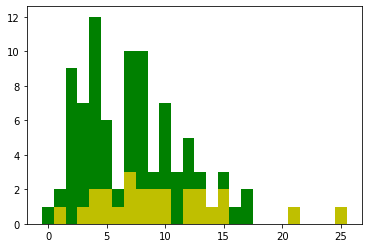

Bowler's Economy  :  7.47191011235955
Bowlership's Economy  :  9.72


Bowler's Skew     :  0.9996704992155931
Bowlership's Skew :  0.27950849718747367
Bowler's Kurtosis     :  1.2274886348759226
Bowlership's Kurtosis :  -0.6562499999999996


Greater : Statistics=223.00, p=0.01 
Two-Sided : Statistics=223.00, p=0.01 
Less : Statistics=223.00, p=0.99 

____________________________________________


WB Rankin GH Dockrell


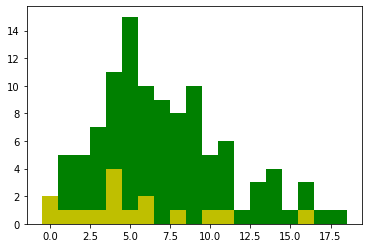

Bowler's Economy  :  7.037383177570093
Bowlership's Economy  :  5.25


Bowler's Skew     :  0.6213882713962506
Bowlership's Skew :  2.066756970473305
Bowler's Kurtosis     :  -0.09201692039290554
Bowlership's Kurtosis :  3.1380208333333295


Greater : Statistics=176.50, p=0.00 
Two-Sided : Statistics=176.50, p=0.00 
Less : Statistics=176.50, p=1.00 

WB Rankin - GH Dockrell better than WB Rankin
____________________________________________


WB Rankin DT Johnston


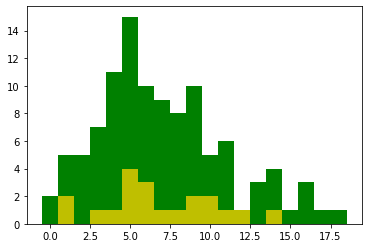

Bowler's Economy  :  7.037383177570093
Bowlership's Economy  :  6.85


Bowler's Skew     :  0.6213882713962506
Bowlership's Skew :  1.303728127812697
Bowler's Kurtosis     :  -0.09201692039290554
Bowlership's Kurtosis :  0.609375


Greater : Statistics=187.00, p=0.00 
Two-Sided : Statistics=187.00, p=0.00 
Less : Statistics=187.00, p=1.00 

WB Rankin - DT Johnston better than WB Rankin
____________________________________________




In [14]:
from collections import Counter 
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu

with open("T20-econ-edges.csv",'w') as fw:
    for name in Bpartner_qualified.keys():
        dfbowler = og_data.loc[og_data['bowler'] == name]
        for pname in Bpartner_qualified[name]:
            print(name,pname)
            dfpairab = paired_data.loc[paired_data['bowler1']==name] 
            dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
            dfpairba = paired_data.loc[paired_data['bowler2']==name]
            dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]

            dict_1 = Counter(dict(dfpairab['runs1'].value_counts())) 
            dict_2 = Counter(dict(dfpairba['runs2'].value_counts()))
            fin_dict = dict(dict_1 + dict_2)
            fin_df = pd.DataFrame(fin_dict.items())

            pure_dict = dict(dfbowler['runs'].value_counts())
            plt.bar(*zip(*pure_dict.items()),color='g',width=1.0)
            plt.bar(*zip(*fin_dict.items()),color='y',width=1.0)

            plt.show()

            s=0
            d=0
            for k,v in pure_dict.items():
                s = s + k*v
                d = d + v
            be = s/d
            print("Bowler's Economy  : ",be)
            s=0
            d=0
            for k,v in fin_dict.items():
                s = s + k*v
                d = d + v
            bse = s/d 
            print("Bowlership's Economy  : ",bse)
            print('\n')

            print("Bowler's Skew     : ",skew(dfbowler['runs'].dropna()))
            print("Bowlership's Skew : ",skew((fin_df[1].dropna())))

            print("Bowler's Kurtosis     : ",kurtosis(dfbowler['runs'].dropna()))
            print("Bowlership's Kurtosis : ",kurtosis((fin_df[1].dropna())))

            print('\n')

            alpha = 0.05

            batch_1 = dfbowler['runs'].value_counts()
            batch_2 = fin_df[1]

            stat1, p_value1 = mannwhitneyu(batch_1, batch_2, alternative="greater") 
            print('Greater : Statistics=%.2f, p=%.2f ' % (stat1, p_value1)) 

            #if p_value1 < alpha: 
                #print('Reject Null Hypothesis => batch1 NOT GREATER than batch2') 
            #else: 
                #print('Do not Reject Null Hypothesis => batch1 GREATER THAN EQUAL TO batch2')

            stat2, p_value2 = mannwhitneyu(batch_1, batch_2, alternative="two-sided") 
            print('Two-Sided : Statistics=%.2f, p=%.2f ' % (stat2, p_value2)) 

            #if p_value2 < alpha: 
                #print('Reject Null Hypothesis => batch1 NOT EQUAL to batch2') 
            #else: 
                #print('Do not Reject Null Hypothesis => batch1 is EQUAL to batch2')

            stat3, p_value3 = mannwhitneyu(batch_1, batch_2, alternative="less") 
            print('Less : Statistics=%.2f, p=%.2f \n' % (stat3, p_value3)) 

            #if p_value3 < alpha: 
                #print('Reject Null Hypothesis => batch1 NOT LESS than batch2') 
            #else: 
                #print('Do not Reject Null Hypothesis => batch1 LESS THAN EQUAL TO batch2')

            if (p_value1 < alpha) and (p_value2 < alpha) and (be > bse):
                print(name,"-",pname,"better than",name)
                fw.write(name+','+pname+'\n')
            if (p_value3 < alpha) and (p_value2 < alpha):
                print(name,"-",pname, "worse than",name)

            print('____________________________________________\n\n')
fw.close()      
#print(fin_dict)
#print(fin_df)

In [15]:
import networkx as nx

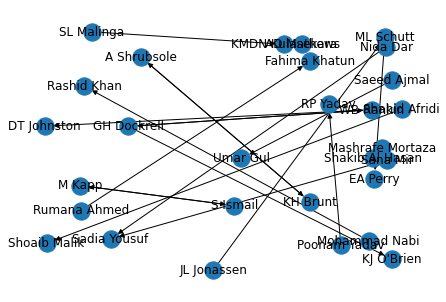

In [16]:
G = nx.read_edgelist('T20-econ-edges.csv',create_using=nx.DiGraph(), delimiter=",")
nx.draw_random(G,with_labels=True)
plt.show()